# Business Problem

In day-to-day life, it can be difficult for law enforcement to determine the severity of some accidents. Without a model to determine the severity of a traffic accident, officers can mistakenly send medical staff to areas where no assistance is needed, or have an ambulance called too late after precious minutes are used on investigating the area for harmed individuals.

The results of this project are best suited for law enforcement officers and local vigilantes; the kinds of people that can reliably witness and act on vehicular accidents.

# Data

The dataset in use comes from the recorded set of vehicular accidents in Seattle since 2004, gathered by the Seattle Police Department and recorded by Traffic Records. It includes information such as the type and severity of the accident, what was involved, where it occurred, and other conditions.

## Dependency & Dataset Acquisition

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-10-23 17:34:11--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  41.9MB/s   in 1.7s   

2020-10-23 17:34:13 (41.9 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [3]:
df = pd.read_csv('Data-Collisions.csv')
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


## Column Overview

SEVERITYCODE: Indicates collision severity. This dataset includes two categories: Property Damage (indicated by a 1) and Injury (indicated by a 2). This column will be used as the model's dependent variable.

### Independent, Apparent Variables

These columns correspond to variables that will be considered for the model which are immediately apparent, even to a bystander that arrives after the accident arrives.

ADDRTYPE: Indicates the type of location where the accident occurred. This includes Alleys, Blocks, and Intersections. NaN also exists, indicating some other location, which will not be considered for the purposes of this study.

LIGHTCOND: Indicates the lighting conditions at the accident. Entries include Daylight, Dark (Street Lights On), Dark (Street Lights Off), Dark (No Street Lights), Dusk, Dawn, Dark (Unknown Lighting), and Other/Unknown.

ROADCOND: Indicates the road conditions at the accident. Entries include Wet, Dry, Snow/Slush, Ice, Sand/Mud/Dirt, Standing Water, Oil, and Other/Unknown.

WEATHER: Indicates the weather conditions at the accident. Entries include Overcase, Raining, Clear, Snowing, Fog/Smog/Smoke, Sleet/Hail/Freezing Rain, Blowing Sand/Dirt, Severe Crosswind, Partly Cloudy, and Other/Unknown.

PEDCOUNT: Indicates the number of pedestrians involved in the collision. Data for this ranges from 0 to 6.

PEDCYLCOUNT: Indicates the number of bicycles involved in the collision. Data for this ranges from 0 to 2.

VEHCOUNT: Indicates the number of vehicles involved in the collision. Data for this ranges from 0 to 12.

### Independent, Semi-Apparent Variables

These columns correspond to variables that will be considered for the model  which are apparent to a bystander at the time of the accident.

COLLISIONTYPE: Indicates the type of collision that occurred. Entries include Angles, Sideswipe, Parked Car, Cycles, Rear-Ended, Head On, Left Turn, Right Turn, Pedestrian, and Other.

HITPARKEDCAR: Indicates whether a parked car was involved in the collision, via a Yes/No entry.

PEDROWNOTGRNT: Indicates whether a pedestrian's right of way was not granted, via a Yes/No entry.

SPEEDING: Indicates whether a speeding vehicle was a key factor in the collision, via a Yes/No entry.

### Independent, Non-Apparent Variables

These columns correspond to variables that will be considered for the model which typically only become apparent after further investigation.

INATTENTIONIND: Indicates if inattention was a factor in the collision, via a Yes/No entry.

UNDERINFL: Indicates if a driver was under the influence of drugs or alcohol, via a Yes/No entry.

PERSONCOUNT: Indicates the number of total people involved in the collision, including drivers, passengers and vehicles. Data ranges from 0 to 81 people involved.

### Unused Variables

Other columns included aspects such as:

Exception Codes: Used to determine NEI (not enough information) values in rows.

Date/Time/Location: Used to describe the exact area and time where the collision occurred. The goal of this model is to provide generalized recommendations. Thus, these variables aren't relevant for the study.

Collision Keys/Codes/Identifiers: Used to distinguish the collision event from others. Row numbers will suffice for the model.

Lane/Segment/Intersection/Crosswalk Key: Used to identify specific traffic landmarks involved. Only the presence/involvement of such factors will suffice.

Descriptions: More detailed descriptions of certain columns. 

### Example Row

The dataset's first row shows data for a vehicular accident, where at least one injury occurred (due to the severity code of 2.)

From the data, one can tell that the incident involved an Angles type collision at an intersection. 2 people and 2 vehicles were involved. No bicycles or pedestrians were involved, and neither of the cars were parked. Neither of the drivers were subject to inattention or intoxication. At the time of the collision, the weather was overcast, involving sufficient daylight, but the road was wet.

From this, we can infer that the intersection was wet from a slight drizzle, before/after a rain period, or by artificial causes (say, a nearby car wash or spillage). One of the cars entered from an angle, lost control due to hydroplaning, and hit the other one, with no other cars suffering from the incident.

# Methodology

This project will focus on detecting key indicators of accident severity in three tiers: information gathered without having witnessed the accident, information gathered having witnessed the accident, and information gathered with a more thorough investigation. These tiers are cumulative, meaning that information gathered by witnessing the accident will also contain information gathered without having witnessed the accident, and information from a full investigation will also contain information from the previous two tiers.

The first step will involve collecting and filtering the aforementioned dataset, removing sufficiently ambiguous cases from consideration, as well as any unused columns.

The second step is to analyze vehicle, pedestrian, bicycle and total person numbers, then construct discrete groups of numbers for each column, to match the discrete nature of the other variables. 

The third step is to convert all the discrete values into dummy variables, so sklearn can handle the data matrix.

Once done, the final step is to construct decision trees for the three tiers of information.

## Data Cleansing

First, we remove unknown/ambiguous cases in collision, light, road, and weather conditions, then we replace 'NaN' and 0/1 indicators in binary columns with simple Y/N markers. Finally, we place numerical values into groups, to lessen the amount of branches their respective columns would normally generate.

In [5]:
dfnan = df.dropna(subset = ['LIGHTCOND'], axis = 0, inplace = False)
dfnan = dfnan[dfnan['LIGHTCOND'] != 'Unknown']
dfnan = dfnan[dfnan['LIGHTCOND'] != 'Other']
dfnan = dfnan[dfnan['LIGHTCOND'] != 'Dark - Unknown Lighting']
dfnan = dfnan.dropna(subset = ['ROADCOND'], axis = 0, inplace = False)
dfnan = dfnan[dfnan['ROADCOND'] != 'Other']
dfnan = dfnan[dfnan['ROADCOND'] != 'Unknown']
dfnan = dfnan.dropna(subset = ['WEATHER'], axis = 0, inplace = False)
dfnan = dfnan[dfnan['WEATHER'] != 'Other']
dfnan = dfnan[dfnan['WEATHER'] != 'Unknown']
dfnan = dfnan.dropna(subset = ['ADDRTYPE'], axis = 0, inplace = False)
dfnan = dfnan.dropna(subset = ['COLLISIONTYPE'], axis = 0, inplace = False)
dfnan = dfnan[dfnan['COLLISIONTYPE'] != 'Other']

dfnan['PEDROWNOTGRNT'].replace(np.nan, 'N', inplace=True)
dfnan['SPEEDING'].replace(np.nan, 'N', inplace=True)
dfnan['INATTENTIONIND'].replace(np.nan, 'N', inplace=True)
dfnan['UNDERINFL'].replace('0', 'N', inplace=True)
dfnan['UNDERINFL'].replace('1', 'Y', inplace=True)


dfnan.rename(columns={'SEVERITYCODE': 'INJURY'}, inplace=True)
dfnan['INJURY'].replace(1, 'N', inplace=True)
dfnan['INJURY'].replace(2, 'Y', inplace=True)


print(np.unique(dfnan['PEDCOUNT'], return_counts=True))
print(np.unique(dfnan['PEDCYLCOUNT'], return_counts=True))
print(np.unique(dfnan['VEHCOUNT'], return_counts=True))
print(np.unique(dfnan['PERSONCOUNT'], return_counts=True))



(array([0, 1, 2, 3, 4, 6]), array([140287,   6350,    217,     20,      2,      1]))
(array([0, 1, 2]), array([141610,   5225,     42]))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([   188,  11272, 120387,  12077,   2262,    492,    133,     40,
           12,      8,      1,      4,      1]))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34,
       35, 36, 37, 39, 41, 43, 44, 47, 53, 54]), array([ 4694,   454, 86656, 31404, 13088,  6037,  2496,  1038,   486,
         200,   117,    44,    28,    17,    19,    11,     8,    11,
           6,     4,     4,     2,     4,     2,     2,     4,     4,
           3,     3,     3,     1,     1,     3,     3,     1,     2,
           3,     1,     1,     1,     6,     3,     1,     1]))


From this analysis we can create the following groups:

In [6]:

#PEDCOUNT: 0, 1, 2+
dfnan['PEDCOUNT'].replace(0, '0', inplace=True)
dfnan['PEDCOUNT'].replace(1, '1', inplace=True)
dfnan['PEDCOUNT'].replace(2, '2+', inplace=True)
dfnan['PEDCOUNT'].replace(3, '2+', inplace=True)
dfnan['PEDCOUNT'].replace(4, '2+', inplace=True)
dfnan['PEDCOUNT'].replace(5, '2+', inplace=True)
dfnan['PEDCOUNT'].replace(6, '2+', inplace=True)


#PEDCYLCOUNT: Renamed CYCLE, indicating whether or not at least one pedestrian bicycle was involved (Y/N)
dfnan.rename(columns={'PEDCYLCOUNT': 'CYCLE'}, inplace=True)
dfnan['CYCLE'].replace(0, 'N', inplace=True)
dfnan['CYCLE'].replace(1, 'Y', inplace=True)
dfnan['CYCLE'].replace(2, 'Y', inplace=True)


#VEHCOUNT: 0, 1, 2, 3, 4+
dfnan['VEHCOUNT'].replace(0, '0', inplace=True)
dfnan['VEHCOUNT'].replace(1, '1', inplace=True)
dfnan['VEHCOUNT'].replace(2, '2', inplace=True)
dfnan['VEHCOUNT'].replace(3, '3', inplace=True)
dfnan['VEHCOUNT'].replace(4, '4+', inplace=True)
dfnan['VEHCOUNT'].replace(5, '4+', inplace=True)
dfnan['VEHCOUNT'].replace(6, '4+', inplace=True)
dfnan['VEHCOUNT'].replace(7, '4+', inplace=True)
dfnan['VEHCOUNT'].replace(8, '4+', inplace=True)
dfnan['VEHCOUNT'].replace(9, '4+', inplace=True)
dfnan['VEHCOUNT'].replace(10, '4+', inplace=True)
dfnan['VEHCOUNT'].replace(11, '4+', inplace=True)
dfnan['VEHCOUNT'].replace(12, '4+', inplace=True)



#PERSONCOUNT: 0, 1, 2, 3, 4, 5-7, 8+
dfnan['PERSONCOUNT'].replace(0, '0', inplace=True)
dfnan['PERSONCOUNT'].replace(1, '1', inplace=True)
dfnan['PERSONCOUNT'].replace(2, '2', inplace=True)
dfnan['PERSONCOUNT'].replace(3, '3', inplace=True)
dfnan['PERSONCOUNT'].replace(4, '4', inplace=True)
dfnan['PERSONCOUNT'].replace(5, '5-7', inplace=True)
dfnan['PERSONCOUNT'].replace(6, '5-7', inplace=True)
dfnan['PERSONCOUNT'].replace(7, '5-7', inplace=True)
dfnan['PERSONCOUNT'].replace(8, '8+', inplace=True)
dfnan['PERSONCOUNT'].replace(9, '8+', inplace=True)
dfnan['PERSONCOUNT'].replace(10, '8+', inplace=True)
dfnan['PERSONCOUNT'].replace(11, '8+', inplace=True)
dfnan['PERSONCOUNT'].replace(12, '8+', inplace=True)
dfnan['PERSONCOUNT'].replace(13, '8+', inplace=True)
dfnan['PERSONCOUNT'].replace(14, '8+', inplace=True)
dfnan['PERSONCOUNT'].replace(15, '8+', inplace=True)
dfnan['PERSONCOUNT'].replace(16, '8+', inplace=True)
dfnan['PERSONCOUNT'].replace(17, '8+', inplace=True)
dfnan['PERSONCOUNT'].replace(18, '8+', inplace=True)
dfnan['PERSONCOUNT'].replace(19, '8+', inplace=True)
dfnan['PERSONCOUNT'].replace(20, '8+', inplace=True)
dfnan['PERSONCOUNT'].replace(21, '8+', inplace=True)
dfnan['PERSONCOUNT'].replace(22, '8+', inplace=True)
dfnan['PERSONCOUNT'].replace(23, '8+', inplace=True)
dfnan['PERSONCOUNT'].replace(24, '8+', inplace=True)
dfnan['PERSONCOUNT'].replace(25, '8+', inplace=True)
dfnan['PERSONCOUNT'].replace(26, '8+', inplace=True)
dfnan['PERSONCOUNT'].replace(27, '8+', inplace=True)
dfnan['PERSONCOUNT'].replace(28, '8+', inplace=True)
dfnan['PERSONCOUNT'].replace(29, '8+', inplace=True)
dfnan['PERSONCOUNT'].replace(30, '8+', inplace=True)
dfnan['PERSONCOUNT'].replace(31, '8+', inplace=True)
dfnan['PERSONCOUNT'].replace(32, '8+', inplace=True)
dfnan['PERSONCOUNT'].replace(34, '8+', inplace=True)
dfnan['PERSONCOUNT'].replace(35, '8+', inplace=True)
dfnan['PERSONCOUNT'].replace(36, '8+', inplace=True)
dfnan['PERSONCOUNT'].replace(37, '8+', inplace=True)
dfnan['PERSONCOUNT'].replace(39, '8+', inplace=True)
dfnan['PERSONCOUNT'].replace(41, '8+', inplace=True)
dfnan['PERSONCOUNT'].replace(43, '8+', inplace=True)
dfnan['PERSONCOUNT'].replace(44, '8+', inplace=True)
dfnan['PERSONCOUNT'].replace(47, '8+', inplace=True)
dfnan['PERSONCOUNT'].replace(53, '8+', inplace=True)
dfnan['PERSONCOUNT'].replace(54, '8+', inplace=True)
#For Loops didn't work the way I wanted them to, and I was in a time crunch. Suggestions welcome.





In [7]:
dfnan[['INJURY', 'ADDRTYPE', 'LIGHTCOND', 'ROADCOND', 'WEATHER', 'PEDCOUNT', 'CYCLE', 'VEHCOUNT']].head(20)

,INJURY,ADDRTYPE,LIGHTCOND,ROADCOND,WEATHER,PEDCOUNT,CYCLE,VEHCOUNT
0,Y,Intersection,Daylight,Wet,Overcast,0,N,2
1,N,Block,Dark - Street Lights On,Wet,Raining,0,N,2
2,N,Block,Daylight,Dry,Overcast,0,N,3
4,Y,Intersection,Daylight,Wet,Raining,0,N,2
5,N,Intersection,Daylight,Dry,Clear,0,N,2
6,N,Intersection,Daylight,Wet,Raining,0,N,2
7,Y,Intersection,Daylight,Dry,Clear,0,Y,1
8,N,Block,Daylight,Dry,Clear,0,N,2
9,Y,Intersection,Daylight,Dry,Clear,0,N,2
11,N,Intersection,Daylight,Dry,Clear,0,N,2


In [8]:
dfnan[['COLLISIONTYPE', 'HITPARKEDCAR', 'PEDROWNOTGRNT', 'SPEEDING']].head(20)

,COLLISIONTYPE,HITPARKEDCAR,PEDROWNOTGRNT,SPEEDING
0,Angles,N,N,N
1,Sideswipe,N,N,N
2,Parked Car,N,N,N
4,Angles,N,N,N
5,Angles,N,N,N
6,Angles,N,N,N
7,Cycles,N,N,N
8,Parked Car,N,N,N
9,Angles,N,N,N
11,Angles,N,N,N


In [9]:
dfnan[['INATTENTIONIND', 'UNDERINFL', 'PERSONCOUNT']].head(20)

,INATTENTIONIND,UNDERINFL,PERSONCOUNT
0,N,N,2
1,N,N,2
2,N,N,4
4,N,N,2
5,N,N,2
6,N,N,2
7,N,N,3
8,N,N,2
9,N,N,2
11,N,N,2


The data is now in a more complete format. Since sklearn cannot handle categorical variables, they must be converted to numerical values. First, we make feature matrices corresponding to the three levels of collision knowledge.

Furthermore, to make sure the decision tree isn't needlessly complex, we'll calculate the injury rate for each category of address, light, road, weather, and collision condition, so that they can be enumerated in order from least to most injury-prone.

In [10]:
print("Alley injury rate: ", np.count_nonzero(dfnan[dfnan['ADDRTYPE'] == 'Alley']['INJURY'] == 'Y') / np.count_nonzero(dfnan['ADDRTYPE'] == 'Alley'))
print("Block injury rate: ", np.count_nonzero(dfnan[dfnan['ADDRTYPE'] == 'Block']['INJURY'] == 'Y') / np.count_nonzero(dfnan['ADDRTYPE'] == 'Block'))
print("Intersection injury rate: ", np.count_nonzero(dfnan[dfnan['ADDRTYPE'] == 'Intersection']['INJURY'] == 'Y') / np.count_nonzero(dfnan['ADDRTYPE'] == 'Intersection'))
print('\n\n')
print("Daylight injury rate: ", np.count_nonzero(dfnan[dfnan['LIGHTCOND'] == 'Daylight']['INJURY'] == 'Y') / np.count_nonzero(dfnan['LIGHTCOND'] == 'Daylight'))
print("Dawn injury rate: ", np.count_nonzero(dfnan[dfnan['LIGHTCOND'] == 'Dawn']['INJURY'] == 'Y') / np.count_nonzero(dfnan['LIGHTCOND'] == 'Dawn'))
print("Dusk injury rate: ", np.count_nonzero(dfnan[dfnan['LIGHTCOND'] == 'Dusk']['INJURY'] == 'Y') / np.count_nonzero(dfnan['LIGHTCOND'] == 'Dusk'))
print("Night w/ Lit Streetlights injury rate: ", np.count_nonzero(dfnan[dfnan['LIGHTCOND'] == 'Dark - Street Lights On']['INJURY'] == 'Y') / np.count_nonzero(dfnan['LIGHTCOND'] == 'Dark - Street Lights On'))
print("Night w/ Unlit Streetlights injury rate: ", np.count_nonzero(dfnan[dfnan['LIGHTCOND'] == 'Dark - Street Lights Off']['INJURY'] == 'Y') / np.count_nonzero(dfnan['LIGHTCOND'] == 'Dark - Street Lights Off'))
print("Night w/o Streetlights injury rate: ", np.count_nonzero(dfnan[dfnan['LIGHTCOND'] == 'Dark - No Street Lights']['INJURY'] == 'Y') / np.count_nonzero(dfnan['LIGHTCOND'] == 'Dark - No Street Lights'))
print('\n\n')
print("Dry injury rate: ", np.count_nonzero(dfnan[dfnan['ROADCOND'] == 'Dry']['INJURY'] == 'Y') / np.count_nonzero(dfnan['ROADCOND'] == 'Dry'))
print("Wet injury rate: ", np.count_nonzero(dfnan[dfnan['ROADCOND'] == 'Wet']['INJURY'] == 'Y') / np.count_nonzero(dfnan['ROADCOND'] == 'Wet'))
print("Snow/Slush injury rate: ", np.count_nonzero(dfnan[dfnan['ROADCOND'] == 'Snow/Slush']['INJURY'] == 'Y') / np.count_nonzero(dfnan['ROADCOND'] == 'Snow/Slush'))
print("Ice injury rate: ", np.count_nonzero(dfnan[dfnan['ROADCOND'] == 'Ice']['INJURY'] == 'Y') / np.count_nonzero(dfnan['ROADCOND'] == 'Ice'))
print("Sand/Mud/Dirt injury rate: ", np.count_nonzero(dfnan[dfnan['ROADCOND'] == 'Sand/Mud/Dirt']['INJURY'] == 'Y') / np.count_nonzero(dfnan['ROADCOND'] == 'Sand/Mud/Dirt'))
print("Standing Water injury rate: ", np.count_nonzero(dfnan[dfnan['ROADCOND'] == 'Standing Water']['INJURY'] == 'Y') / np.count_nonzero(dfnan['ROADCOND'] == 'Standing Water'))
print("Oil injury rate: ", np.count_nonzero(dfnan[dfnan['ROADCOND'] == 'Oil']['INJURY'] == 'Y') / np.count_nonzero(dfnan['ROADCOND'] == 'Oil'))
print('\n\n')
print("Clear injury rate: ", np.count_nonzero(dfnan[dfnan['WEATHER'] == 'Clear']['INJURY'] == 'Y') / np.count_nonzero(dfnan['WEATHER'] == 'Clear'))
print("Partly Cloudy injury rate: ", np.count_nonzero(dfnan[dfnan['WEATHER'] == 'Partly Cloudy']['INJURY'] == 'Y') / np.count_nonzero(dfnan['WEATHER'] == 'Partly Cloudy'))
print("Overcast injury rate: ", np.count_nonzero(dfnan[dfnan['WEATHER'] == 'Overcast']['INJURY'] == 'Y') / np.count_nonzero(dfnan['WEATHER'] == 'Overcast'))
print("Raining injury rate: ", np.count_nonzero(dfnan[dfnan['WEATHER'] == 'Raining']['INJURY'] == 'Y') / np.count_nonzero(dfnan['WEATHER'] == 'Raining'))
print("Snowing injury rate: ", np.count_nonzero(dfnan[dfnan['WEATHER'] == 'Snowing']['INJURY'] == 'Y') / np.count_nonzero(dfnan['WEATHER'] == 'Snowing'))
print("Fog/Smog/Smoke injury rate: ", np.count_nonzero(dfnan[dfnan['WEATHER'] == 'Fog/Smog/Smoke']['INJURY'] == 'Y') / np.count_nonzero(dfnan['WEATHER'] == 'Fog/Smog/Smoke'))
print("Sleet/Hail/Freezing Rain injury rate: ", np.count_nonzero(dfnan[dfnan['WEATHER'] == 'Sleet/Hail/Freezing Rain']['INJURY'] == 'Y') / np.count_nonzero(dfnan['WEATHER'] == 'Sleet/Hail/Freezing Rain'))
print("Blowing Sand/Dirt injury rate: ", np.count_nonzero(dfnan[dfnan['WEATHER'] == 'Blowing Sand/Dirt']['INJURY'] == 'Y') / np.count_nonzero(dfnan['WEATHER'] == 'Blowing Sand/Dirt'))
print("Severe Crosswind injury rate: ", np.count_nonzero(dfnan[dfnan['WEATHER'] == 'Severe Crosswind']['INJURY'] == 'Y') / np.count_nonzero(dfnan['WEATHER'] == 'Severe Crosswind'))
print('\n\n')
print("Pedestrian injury rate: ", np.count_nonzero(dfnan[dfnan['COLLISIONTYPE'] == 'Pedestrian']['INJURY'] == 'Y') / np.count_nonzero(dfnan['COLLISIONTYPE'] == 'Pedestrian'))
print("Head On injury rate: ", np.count_nonzero(dfnan[dfnan['COLLISIONTYPE'] == 'Head On']['INJURY'] == 'Y') / np.count_nonzero(dfnan['COLLISIONTYPE'] == 'Head On'))
print("Right Turn injury rate: ", np.count_nonzero(dfnan[dfnan['COLLISIONTYPE'] == 'Right Turn']['INJURY'] == 'Y') / np.count_nonzero(dfnan['COLLISIONTYPE'] == 'Right Turn'))
print("Left Turn injury rate: ", np.count_nonzero(dfnan[dfnan['COLLISIONTYPE'] == 'Left Turn']['INJURY'] == 'Y') / np.count_nonzero(dfnan['COLLISIONTYPE'] == 'Left Turn'))
print("Rear Ended injury rate: ", np.count_nonzero(dfnan[dfnan['COLLISIONTYPE'] == 'Rear Ended']['INJURY'] == 'Y') / np.count_nonzero(dfnan['COLLISIONTYPE'] == 'Rear Ended'))
print("Angles injury rate: ", np.count_nonzero(dfnan[dfnan['COLLISIONTYPE'] == 'Angles']['INJURY'] == 'Y') / np.count_nonzero(dfnan['COLLISIONTYPE'] == 'Angles'))
print("Sideswipe injury rate: ", np.count_nonzero(dfnan[dfnan['COLLISIONTYPE'] == 'Sideswipe']['INJURY'] == 'Y') / np.count_nonzero(dfnan['COLLISIONTYPE'] == 'Sideswipe'))
print("Parked Car injury rate: ", np.count_nonzero(dfnan[dfnan['COLLISIONTYPE'] == 'Parked Car']['INJURY'] == 'Y') / np.count_nonzero(dfnan['COLLISIONTYPE'] == 'Parked Car'))
print("Cycles injury rate: ", np.count_nonzero(dfnan[dfnan['COLLISIONTYPE'] == 'Cycles']['INJURY'] == 'Y') / np.count_nonzero(dfnan['COLLISIONTYPE'] == 'Cycles'))

Alley injury rate:  0.15954415954415954
Block injury rate:  0.26674693643309666
Intersection injury rate:  0.4482908132295045



Daylight injury rate:  0.347027254340469
Dawn injury rate:  0.3480020232675771
Dusk injury rate:  0.34458367016976554
Night w/ Lit Streetlights injury rate:  0.31609346285114204
Night w/ Unlit Streetlights injury rate:  0.2855567805953694
Night w/o Streetlights injury rate:  0.23866790009250693



Dry injury rate:  0.33505609124676394
Wet injury rate:  0.3494115526254796
Snow/Slush injury rate:  0.1784037558685446
Ice injury rate:  0.24457308248914617
Sand/Mud/Dirt injury rate:  0.3870967741935484
Standing Water injury rate:  0.3
Oil injury rate:  0.43478260869565216



Clear injury rate:  0.3355670211204094
Partly Cloudy injury rate:  0.75
Overcast injury rate:  0.33169714608401024
Raining injury rate:  0.3545054945054945
Snowing injury rate:  0.18769716088328076
Fog/Smog/Smoke injury rate:  0.32629107981220656
Sleet/Hail/Freezing Rain injury rate:  0.278481

Thus, conditions are ordered as follows:

Address Type: Alley, Block, Intersection

Light Condition: Night w/o Streetlights, Night w/ Unlit Streetlights, Night w/ Lit Streetlights, Dusk, Daylight, Dawn

Road Condition: Snow/Slush, Ice, Standing Water, Dry, Wet, Sand/Mud/Dirt, Oil

Weather Condition: Severe Crosswind, Snowing, Sleet/Hail/Freezing Rain, Blowing Sand/Dirt, Fog/Smog/Smoke, Overcast, Clear, Raining, Partly Cloudy

Collision Type: Parked Car, Sideswipe, Right Turn, Angles, Left Turn, Rear Ended, Head On, Cycles, Pedestrian

In [11]:
from sklearn import preprocessing
dfnum = dfnan[['INJURY', 'ADDRTYPE', 'LIGHTCOND', 'ROADCOND', 'WEATHER', 
               'PEDCOUNT', 'CYCLE', 'VEHCOUNT', 'COLLISIONTYPE', 'HITPARKEDCAR', 'PEDROWNOTGRNT', 'SPEEDING', 
               'INATTENTIONIND', 'UNDERINFL', 'PERSONCOUNT']].values

le_inj = preprocessing.LabelEncoder()
le_inj.fit(['N', 'Y'])
# N (no injury) = 0, Y = 1
dfnum[:,0]=le_inj.transform(dfnum[:,0])

le_addr = preprocessing.LabelEncoder()
le_addr.fit(['Alley', 'Block', 'Intersection']) # Alley = 0, Block = 1, Intersection = 2
dfnum[:,1]=le_addr.transform(dfnum[:,1])

le_light = preprocessing.LabelEncoder()
le_light.fit(['Dark - No Street Lights', 'Dark - Street Lights Off', 'Dark - Street Lights On', 'Dusk', 'Daylight', 'Dawn'])

# Dark w/o Streetlights = 0, Dark w/ unlit Streetlights = 1, Dark w/ lit Streetlights = 2, Dusk = 3, Daylight = 4, Dawn = 5
dfnum[:,2]=le_light.transform(dfnum[:,2])

le_road = preprocessing.LabelEncoder() 
le_road.fit(['Snow/Slush', 'Ice', 'Standing Water', 'Dry', 'Wet', 'Sand/Mud/Dirt', 'Oil']) 
# Snow/Slush = 0, Ice = 1, Standing Water = 2, Dry = 3, Wet = 4, Sand/Mud/Dirt = 5, Oil = 6
dfnum[:,3]=le_road.transform(dfnum[:,3])

le_weather = preprocessing.LabelEncoder()
le_weather.fit(['Severe Crosswind', 'Snowing', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt', 'Fog/Smog/Smoke', 
                'Overcast', 'Clear', 'Raining','Partly Cloudy'])
# Severe Crosswind = 0, Snowing = 1, Sleet/Hail/Freezing Rain = 2, Blowing Sand/Dirt = 3, Fog/Smog/Smoke = 4, 
# Overcast = 5, Clear = 6, Raining = 7, Partly Cloudy = 8
dfnum[:,4]=le_weather.transform(dfnum[:,4])


le_ped = preprocessing.LabelEncoder()
le_ped.fit(['0', '1', '2+'])
# '2+' cast to 2.
dfnum[:,5]=le_ped.transform(dfnum[:,5])

le_cycle = preprocessing.LabelEncoder()
le_cycle.fit(['N', 'Y'])
# N (Bicycle not involved) = 0, Y = 1
dfnum[:,6]=le_cycle.transform(dfnum[:,6])

le_veh = preprocessing.LabelEncoder()
le_veh.fit(['0', '1', '2', '3', '4+'])
# '4+' cast to 4.
dfnum[:,7]=le_veh.transform(dfnum[:,7])


le_collision = preprocessing.LabelEncoder()
le_collision.fit(['Parked Car', 'Sideswipe', 'Right Turn', 'Angles', 'Left Turn', 'Rear Ended', 'Head On', 'Cycles', 'Pedestrian'])

# Parked Car = 0, Sideswipe = 1, Right Turn = 2, Angles = 3, Left Turn = 4, Rear Ended = 5, Head On = 6, Cycles = 7, Pedestrian = 8
dfnum[:,8]=le_collision.transform(dfnum[:,8])

le_parked = preprocessing.LabelEncoder()
le_parked.fit(['N', 'Y'])
# N (Parked vehicle not involved) = 0, Y = 1
dfnum[:,9]=le_parked.transform(dfnum[:,9])

le_row = preprocessing.LabelEncoder()
le_row.fit(['N', 'Y'])
# N (R.O.W granted) = 0, Y = 1
dfnum[:,10]=le_row.transform(dfnum[:,10])

le_speed = preprocessing.LabelEncoder()
le_speed.fit(['N', 'Y'])
# N = 0, Y = 1
dfnum[:,11]=le_speed.transform(dfnum[:,11])

le_atten = preprocessing.LabelEncoder()
le_atten.fit(['N', 'Y'])
# N (Inattention was not a factor) = 0, Y = 1
dfnum[:,12]=le_atten.transform(dfnum[:,12])

le_infl = preprocessing.LabelEncoder()
le_infl.fit(['N', 'Y'])
# N (No influence of drugs/alcohol) = 0, Y = 1
dfnum[:,13]=le_infl.transform(dfnum[:,13])

le_person = preprocessing.LabelEncoder()
le_person.fit(['0', '1', '2', '3', '4', '5-7', '8+'])
# '5-7' cast to 5, '8+' cast to 6.
dfnum[:,14]=le_person.transform(dfnum[:,14])

dfcomplete = dfnum.astype(int)

Now, we create four different matrices. Y is the response vector (accident severity), X1 is the immediately apparent feature matrix, X2 is the semi-apparent feature matrix, and X3 is the full investigation feature matrix.

In [12]:
y = dfcomplete[:, 0]
x1 = dfcomplete[:, range(1, 8)]
x2 = dfcomplete[:, range(1, 12)]
x3 = dfcomplete[:, range(1, 15)]

In [13]:
from sklearn.model_selection import train_test_split
x1train, x1test, y1train, y1test = train_test_split(x1, y, test_size=0.3, random_state=3)
x2train, x2test, y2train, y2test = train_test_split(x2, y, test_size=0.3, random_state=3)
x3train, x3test, y3train, y3test = train_test_split(x3, y, test_size=0.3, random_state=3)

In [29]:
from sklearn.tree import DecisionTreeClassifier
imm_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
semi_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
inv_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)

Fit the data to train the trees, then use the testing portion to evaluate predictions.

In [30]:
imm_tree.fit(x1train, y1train)
semi_tree.fit(x2train, y2train)
inv_tree.fit(x3train, y3train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
imm_predtree = imm_tree.predict(x1test)
semi_predtree = semi_tree.predict(x2test)
inv_predtree = inv_tree.predict(x3test)

# Results

Here, we measure the accuracy of each of the three trees.

In [32]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Immediate DecisionTree Accuracy: ", metrics.accuracy_score(y1test, imm_predtree))
print("Semi-Apparent DecisionTree Accuracy: ", metrics.accuracy_score(y2test, semi_predtree))
print("Investigative DecisionTree Accuracy: ", metrics.accuracy_score(y3test, inv_predtree))

Immediate DecisionTree Accuracy:  0.7260121641249092
Semi-Apparent DecisionTree Accuracy:  0.7257625272331155
Investigative DecisionTree Accuracy:  0.7241512345679012


The percent accuracy does not seem to increase with greater sets of information, therefore it becomes clear that some immediately noticeable factor is the main clue in determining accident severity. 

The following code visualizes the three trees.

In [18]:
#!conda config --remove channels conda-forge 
#!conda config --add channels conda-forge

In [21]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    pydotplus-2.0.2            |     pyhd1c1de3_3          23 KB  conda-forge
    certifi-2020.6.20          |   py36h9880bd3_2         151 KB  conda-forge
    openssl-1.1.1h             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

    pydotplus:       2.0.2-pyhd1c1de3_3 conda-forge
    python_abi:      3.6-1_cp36m        conda-forge

The following packages will be UPDATED:

 

In [33]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 
print('Load complete!')

Load complete!


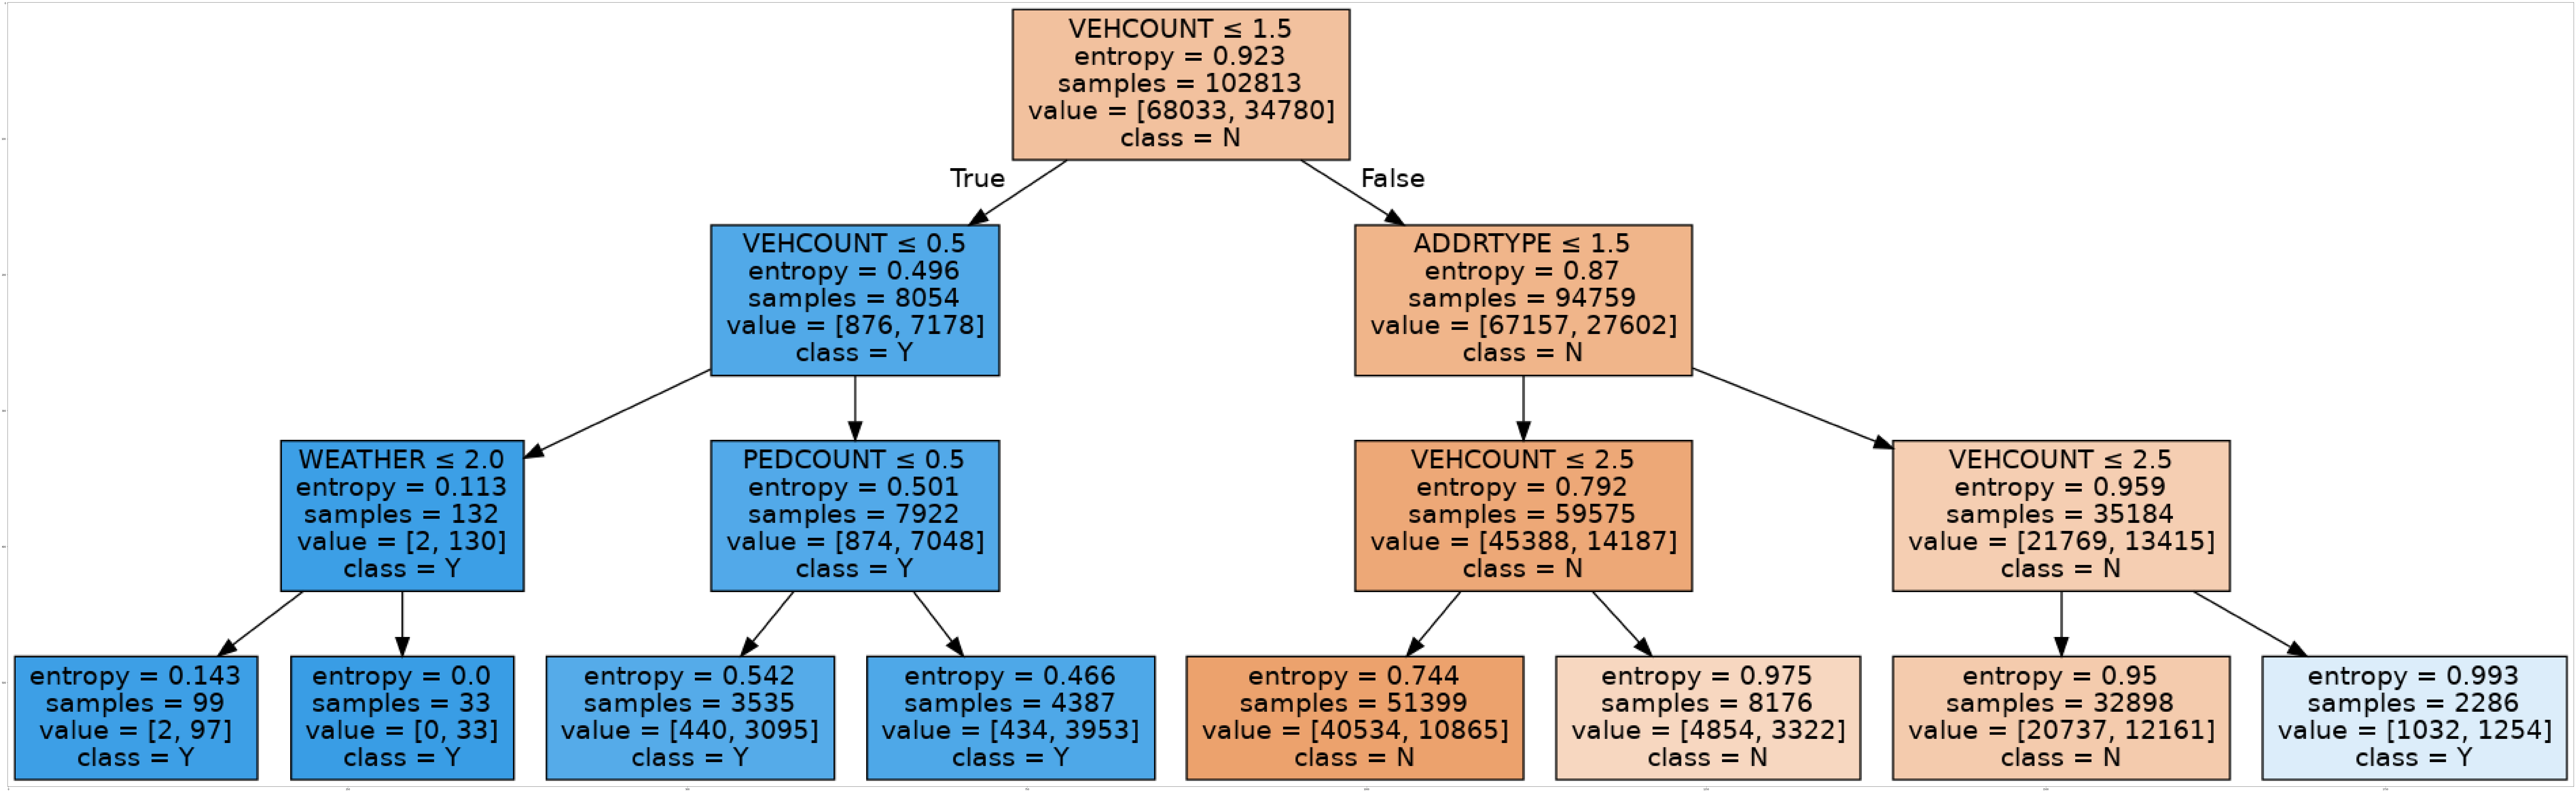

In [34]:
dot_data = StringIO()
filename = "immtree.png"
featureNames = ['ADDRTYPE', 'LIGHTCOND', 'ROADCOND', 'WEATHER', 'PEDCOUNT', 'CYCLE', 'VEHCOUNT']
targetNames = dfnan["INJURY"].unique().tolist()
out=tree.export_graphviz(imm_tree,feature_names=featureNames, out_file=dot_data, class_names= ['N', 'Y'], filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(200, 200))
plt.imshow(img,interpolation='nearest')

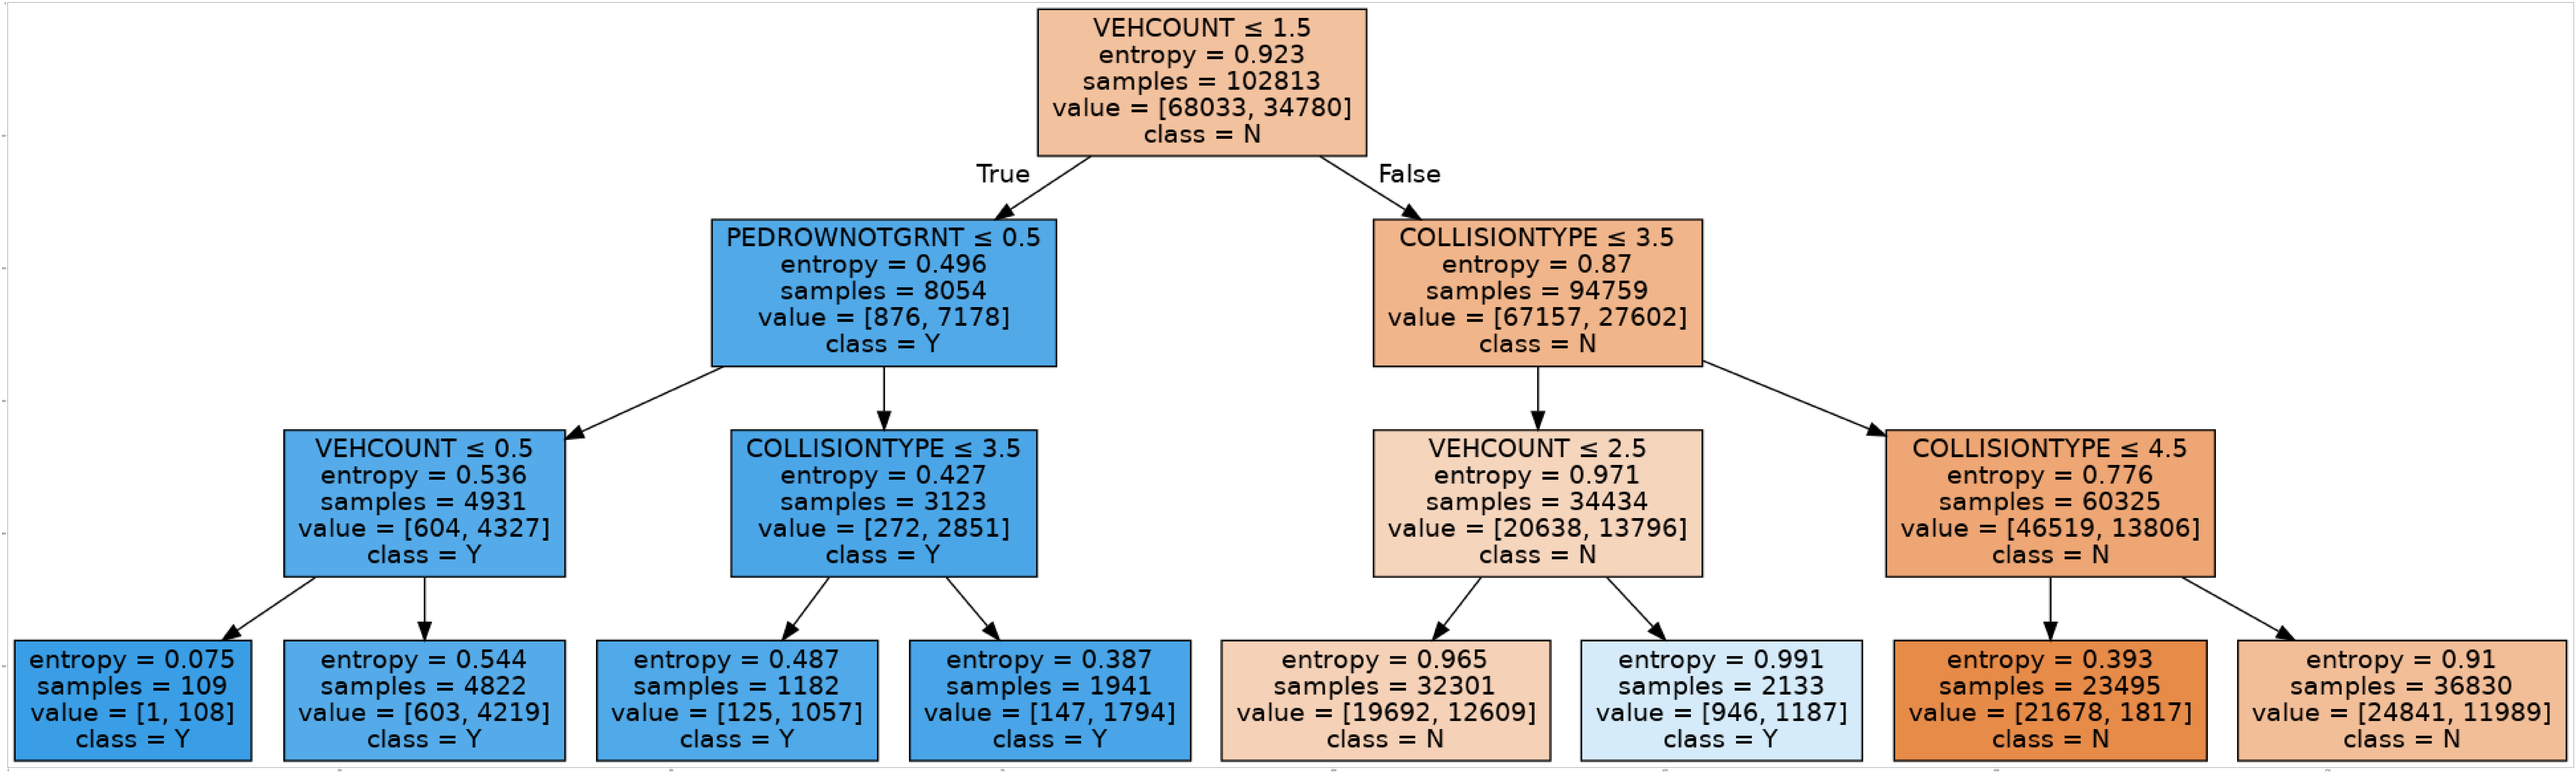

In [35]:
dot_data = StringIO()
filename = "semitree.png"
featureNames = ['ADDRTYPE', 'LIGHTCOND', 'ROADCOND', 'WEATHER', 'PEDCOUNT', 'CYCLE', 'VEHCOUNT', 'COLLISIONTYPE', 'HITPARKEDCAR', 'PEDROWNOTGRNT', 'SPEEDING']
targetNames = dfnan["INJURY"].unique().tolist()
out=tree.export_graphviz(semi_tree,feature_names=featureNames, out_file=dot_data, class_names= ['N', 'Y'], filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(200, 200))
plt.imshow(img,interpolation='nearest')


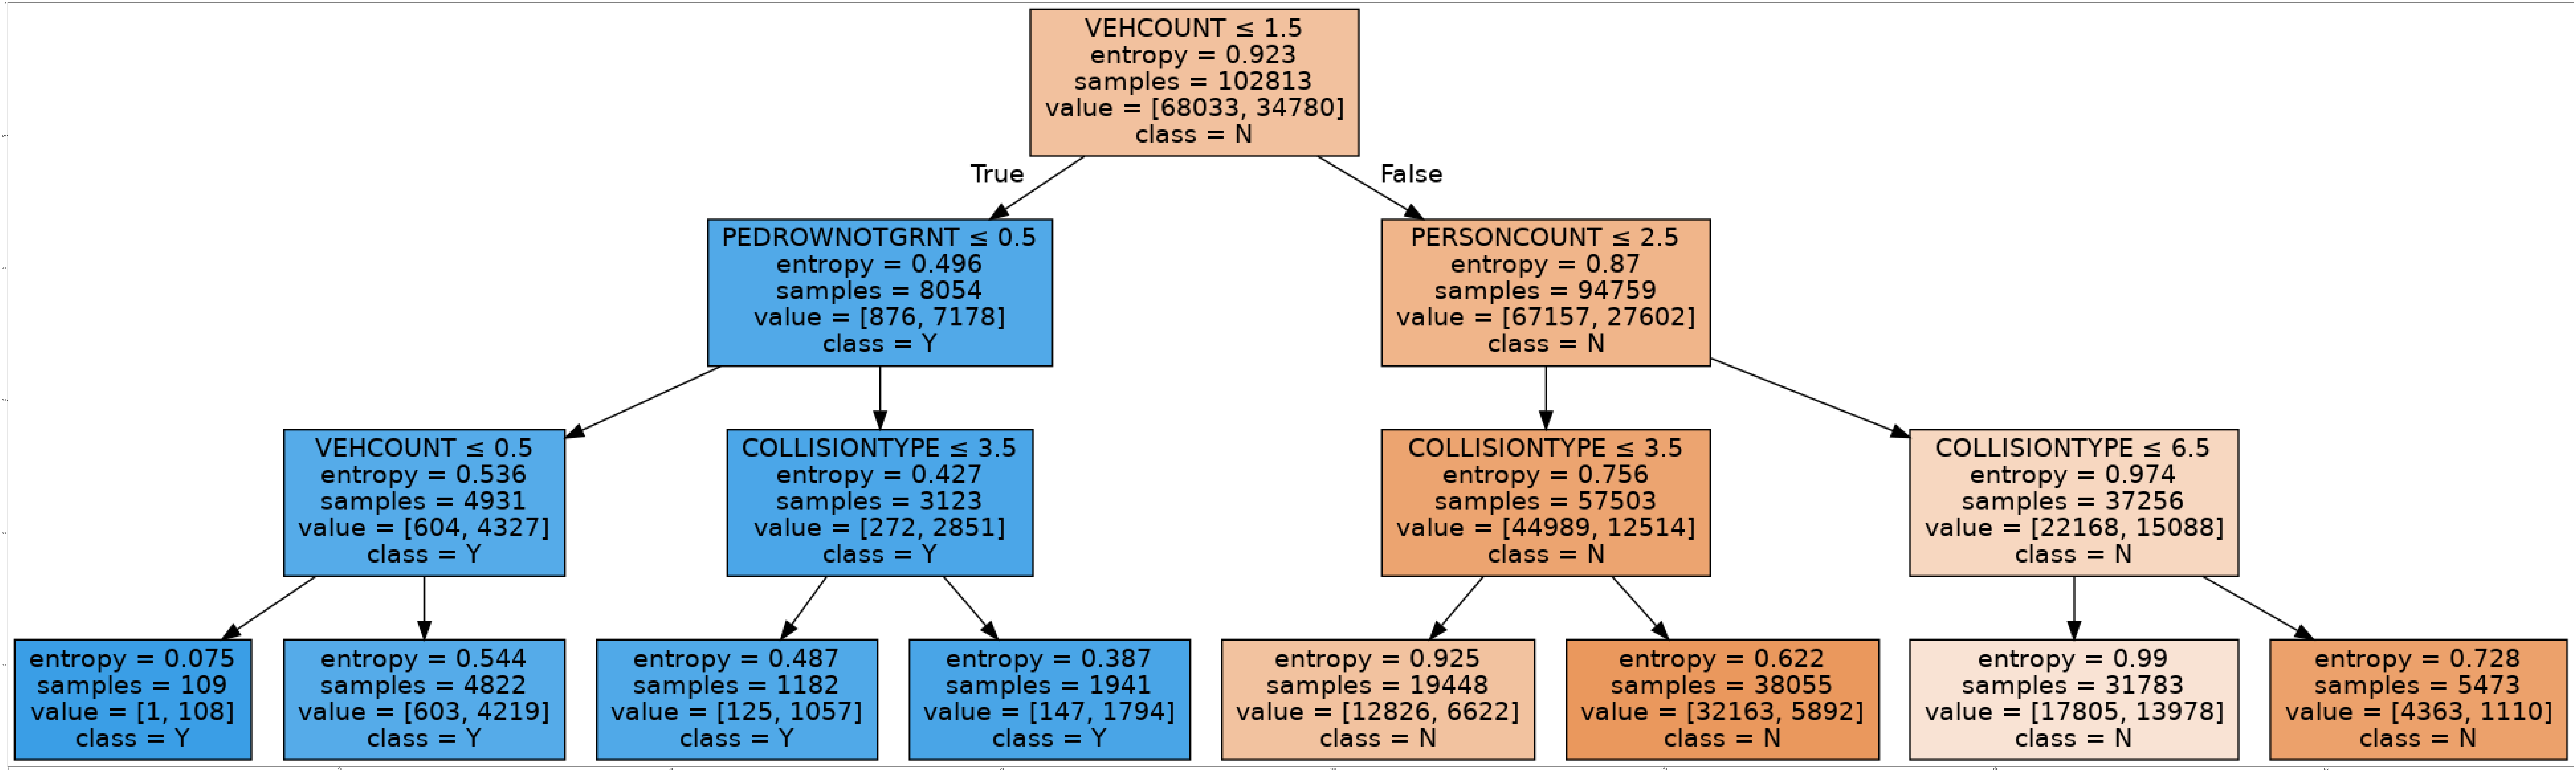

In [36]:
dot_data = StringIO()
filename = "invtree.png"
featureNames = ['ADDRTYPE', 'LIGHTCOND', 'ROADCOND', 'WEATHER', 'PEDCOUNT', 'CYCLE', 'VEHCOUNT', 'COLLISIONTYPE', 'HITPARKEDCAR', 'PEDROWNOTGRNT', 'SPEEDING','INATTENTIONIND', 'UNDERINFL', 'PERSONCOUNT']
targetNames = dfnan["INJURY"].unique().tolist()
out=tree.export_graphviz(inv_tree,feature_names=featureNames, out_file=dot_data, class_names= ['N', 'Y'], filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(200, 200))
plt.imshow(img,interpolation='nearest')

# Discussion

The three decision trees show a clear agreement in what determines the presence of injuries in a vehicular collision: the presence of two or more vehicles. In most cases, the involvement of less than two vehicles is indicative of a higher probability of injury.

Each constructed tree had a maximum depth of 3. A greater depth increased complexity, but didn't give any clearer results or develop a greater prediction accuracy.

## Decision Tree for Immediately Apparent Factors

For incidents involving multiple cars, those that don't occur at an intersection and involve parked cars, right turns, sideswipes, and angles are likely to not involve injuries, whereas other cases may be more ambiguous. 

## Decision Tree for Semi-Apparent Factors

For incidents involving multiple cars, those that involve left turns are likely to not involve injuries, while the rest remain more ambiguous.

## Decision Tree for Investigative Factors

For incidents involving multiple cars, two situations were indicative of mostly non-injurious collisions:

A: Fewer than 3 people were involved, and the collision didn't involve a parked car, sideswipe, angle, or right turn.

B: At least 3 people, as well as either a pedestrian or a cyclist.

For the other cases, the results are more ambiguous.

# Conclusion

From these studies, one can conclude that more injurious accidents occur in more typical conditions, with the possible exception of extremely unexpected events, such as oil slicks. The presence of other vehicles and averse conditions such as snow, iced roads, and the lack of proper lighting would cause drivers to exercise much more caution when driving. Such drivers are usually less likely to drive recklessly, thus diminishing the odds of injury.

Therefore, reducing injuries and vehicular accidents in Seattle should start with a general awareness in driving, not just in averse conditions.